In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
dataset = raw_dataset.copy()
dataset.tail()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

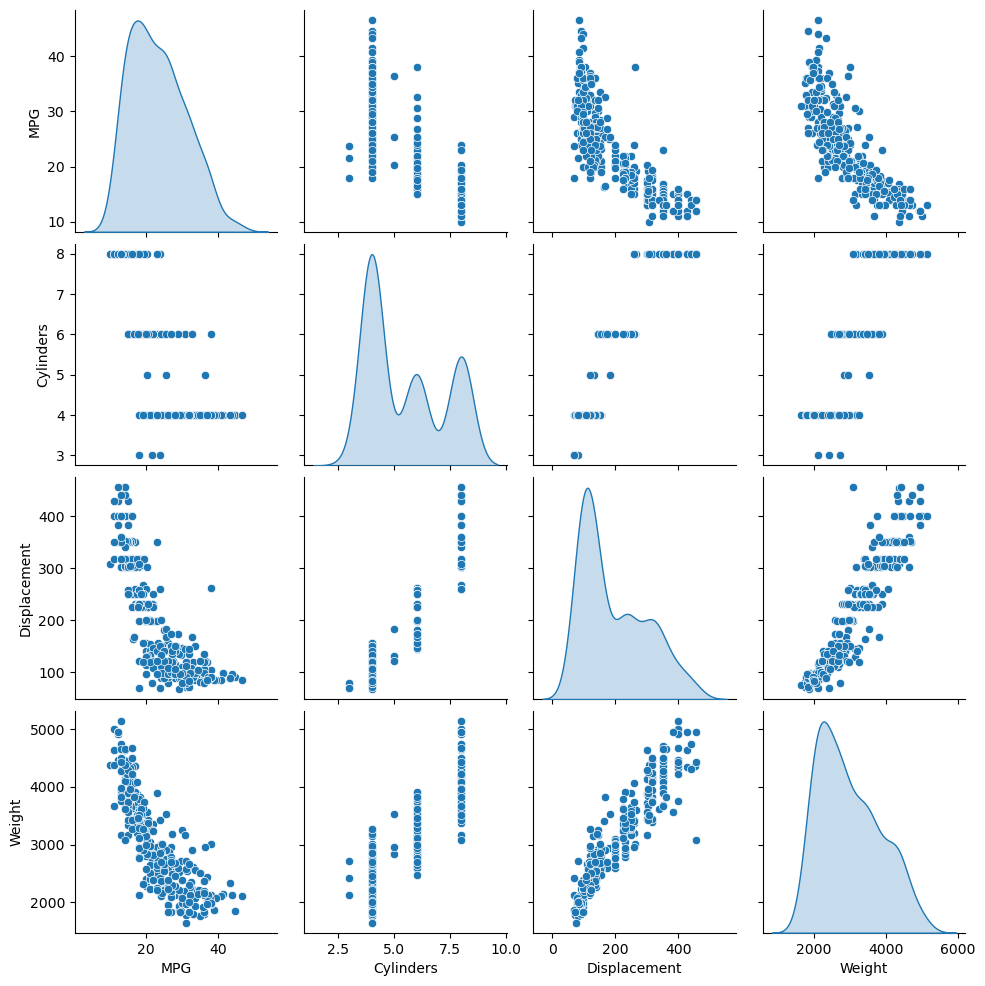

In [6]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.
The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.


In [28]:
arr = np.asarray([[1,2,1], [1,4,5], [1,6,6]])
arr1 = (arr - arr.mean(axis=0))/arr.std(axis=0)
print(arr1)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(arr)

print(normalizer(arr).numpy())

[[   nan -1.225 -1.389]
 [   nan  0.     0.463]
 [   nan  1.225  0.926]]
[[ 0.    -1.225 -1.389]
 [ 0.     0.     0.463]
 [ 0.     1.225  0.926]]


C:\Users\Wei\AppData\Local\Temp\ipykernel_12316\2448107914.py:2: RuntimeWarning: invalid value encountered in true_divide
  arr1 = (arr - arr.mean(axis=0))/arr.std(axis=0)


In [36]:
arr = train_features.iloc[:10]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(arr)
print(normalizer(arr).numpy())
print('----------------------------------------')
print()
from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(arr))
print('----------------------------------------')
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
print(minmax.fit_transform(train_features))
print('----------------------------------------')
normalized_arr = (arr.values - arr.values.mean(axis=0))/arr.values.std(axis=0)
print(normalized_arr)
print('----------------------------------------')
# pandas df use different ways of computing std
normalized_arr = (arr - arr.mean(axis=0))/arr.std(axis=0)
print(normalized_arr)

[[-0.603 -0.806 -0.373 -0.85  -1.119 -0.941 -0.333 -0.655  0.816]
 [-0.603 -0.18   0.098  0.182  0.072  0.529 -0.333 -0.655  0.816]
 [ 2.412  2.447  2.705  2.294 -1.544 -1.529 -0.333 -0.655  0.816]
 [-0.603 -0.618 -0.808 -0.85  -1.034  1.412 -0.333 -0.655  0.816]
 [-0.603 -0.718 -0.663 -0.823  0.37   0.824 -0.333  1.528 -1.225]
 [ 0.905  0.971  0.17   0.614  0.03   0.235 -0.333 -0.655  0.816]
 [-0.603 -0.818 -0.916 -1.062  0.71   0.824 -0.333  1.528 -1.225]
 [-0.603 -0.105 -0.663  0.668  1.986  0.824  3.    -0.655 -1.225]
 [ 0.905  0.545  0.351  0.468 -0.268 -0.941 -0.333 -0.655  0.816]
 [-0.603 -0.718  0.098 -0.642  0.795 -1.235 -0.333  1.528 -1.225]]
----------------------------------------

[[-0.603 -0.806 -0.373 -0.85  -1.119 -0.941 -0.333 -0.655  0.816]
 [-0.603 -0.18   0.098  0.182  0.072  0.529 -0.333 -0.655  0.816]
 [ 2.412  2.447  2.705  2.294 -1.544 -1.529 -0.333 -0.655  0.816]
 [-0.603 -0.618 -0.808 -0.85  -1.034  1.412 -0.333 -0.655  0.816]
 [-0.603 -0.718 -0.663 -0.823  0.

In [38]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
horsepower_normalizer(horsepower).numpy()[:10]

array([-0.785, -0.444,  1.449, -1.101, -0.996, -0.391, -1.18 , -0.996,
       -0.259, -0.444], dtype=float32)

In [39]:
((horsepower - horsepower.mean()) / horsepower.std())[:10]

array([-0.785, -0.444,  1.449, -1.101, -0.996, -0.391, -1.18 , -0.996,
       -0.259, -0.444])

In [40]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [41]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 3.09 s


In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.806468,4.205017,95
96,3.806333,4.185505,96
97,3.802676,4.172192,97
98,3.805311,4.191405,98
99,3.801321,4.185942,99


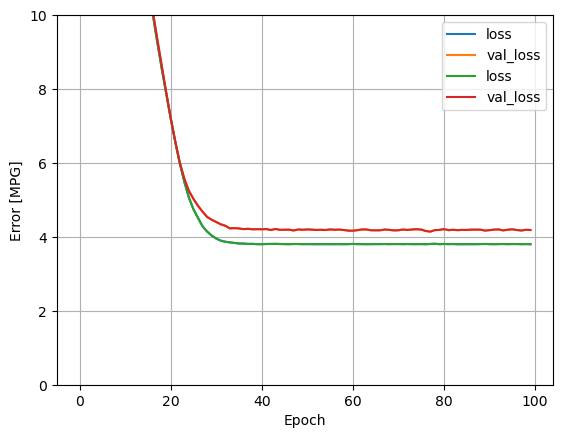

In [44]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_loss(history)

In [45]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [46]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 925us/step


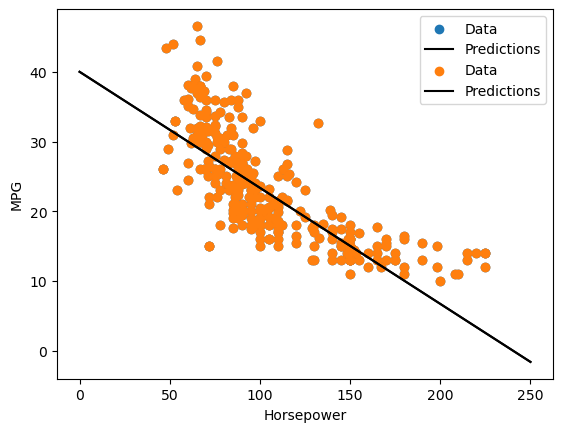

In [48]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.show()
    
plot_horsepower(x, y)

In [50]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=16),
    layers.Dense(units=1)
])
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 16)                32        
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 52
Trainable params: 49
Non-trainable params: 3
_________________________________________________________________


In [51]:
horsepower_model.fit(train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

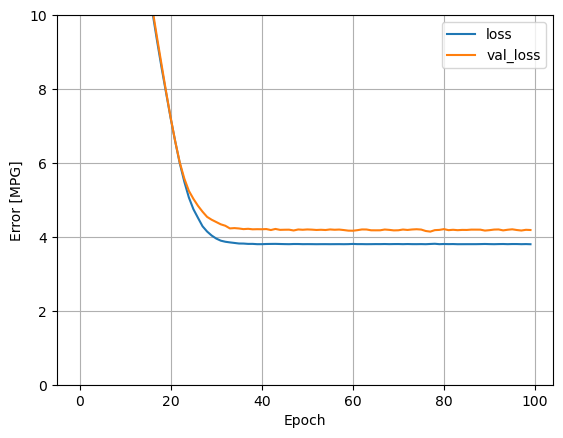

In [52]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_loss(history)

8/8 [==============================] - 0s 997us/step


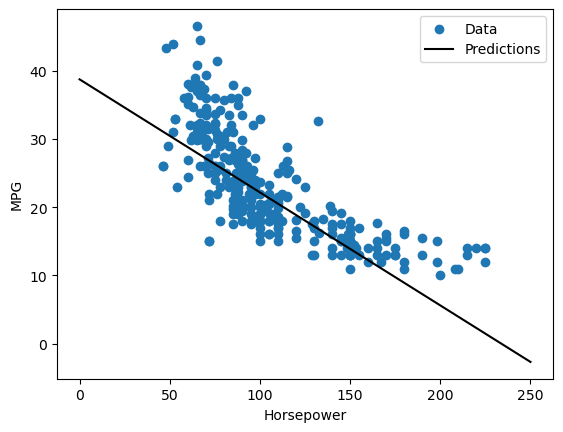

In [54]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.show()
    
plot_horsepower(x, y)

In [60]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_features.values)

model = tf.keras.Sequential([normalizer,
                             layers.Dense(64), 
                             layers.Dense(16), 
                             layers.Dense(1)])
model.compile(loss='mean_absolute_error', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=.001))

history = model.fit(train_features, train_labels, batch_size=8, verbose=1, validation_split=.2, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 23.0429 - val_loss: 23.3341
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 22.5185 - val_loss: 22.7679
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 21.6739 - val_loss: 21.6663
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 19.9848 - val_loss: 19.3540
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 16.3884 - val_loss: 14.4076
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 9.1954 - val_loss: 5.7772
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7565 - val_loss: 2.8099
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7607 - val_loss: 2.6792
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6000 - val_loss: 2.6024
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5957 - val_loss: 2.6679

Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5524 - val_loss: 2.5472
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4943 - val_loss: 2.4591
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5709 - val_loss: 2.5811
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5514 - val_loss: 2.4701
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5570 - val_loss: 2.4541
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5436 - val_loss: 2.4480
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5296 - val_loss: 2.4430
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5389 - val_loss: 2.4633
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5493 - val_loss: 2.4655
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5097 - val_loss: 2.5705


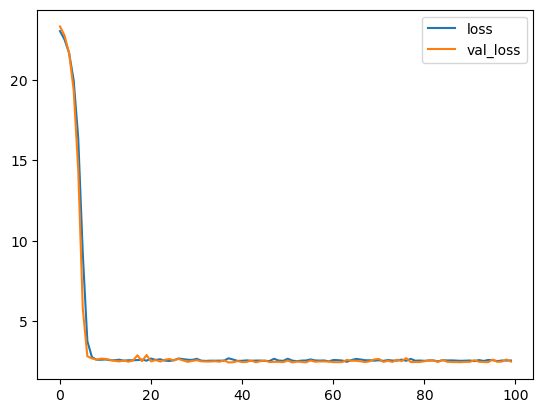

In [64]:
plt.close()
pd.DataFrame(history.history).plot()
plt.show()

10/10 [==============================] - 0s 897us/step


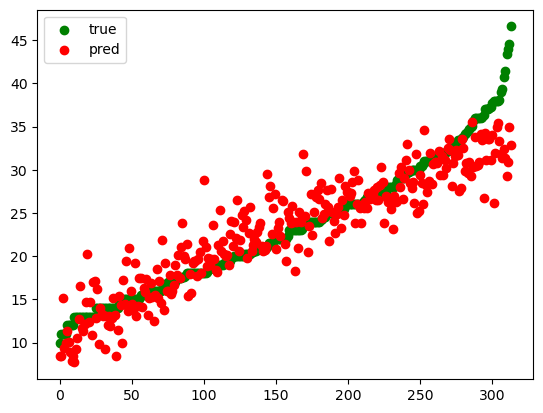

In [77]:
pred = model.predict(train_features)

res = pd.DataFrame({'true': train_labels, 'pred': pred.ravel()})
res = res.sort_values('true')
plt.close()
fig, ax = plt.subplots()
ax.scatter(range(len(res)), res.true, color='g', label='true')
ax.scatter(range(len(res)), res.pred, color='r', label='pred')
ax.legend()
plt.show()

In [79]:
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

calculate_mape(np.asarray(res.true), np.asarray(res.pred))

11.22